In [1]:
from nnpaths import SignType

subsetName = SignType.WARNING.value
subsetName

'warning'

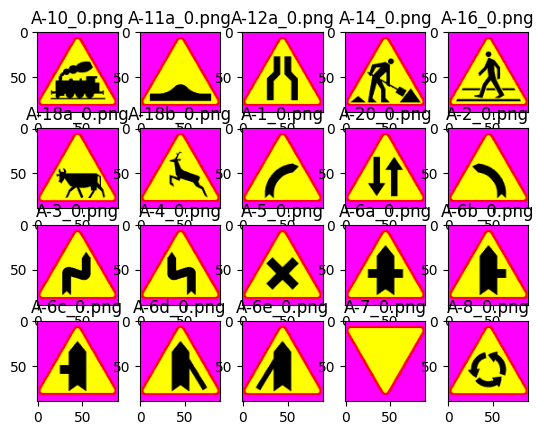

In [2]:
from dataset_prepare import preprocessSignsForNN
from OpenCV_plots import plotGrid

preprocessSignsResult = preprocessSignsForNN(subsetName, 1)
plotGrid(preprocessSignsResult.outputDirPath)

C:\Users\student\Documents\repos\road-sign-checker\ai\sign-classificators\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\student\Documents\repos\road-sign-checker\ai\sign-classificators\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


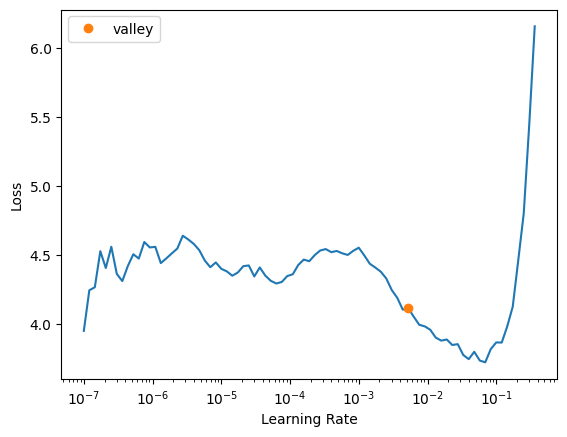

In [3]:
from sign_type_learner import SpecificSignTypeLearner

learner = SpecificSignTypeLearner(preprocessSignsResult.outputDirPath, subsetName, 4)
learner.tuneModel(1)
modelPath = learner.modelPath

In [11]:
learner.tuneModel(5)

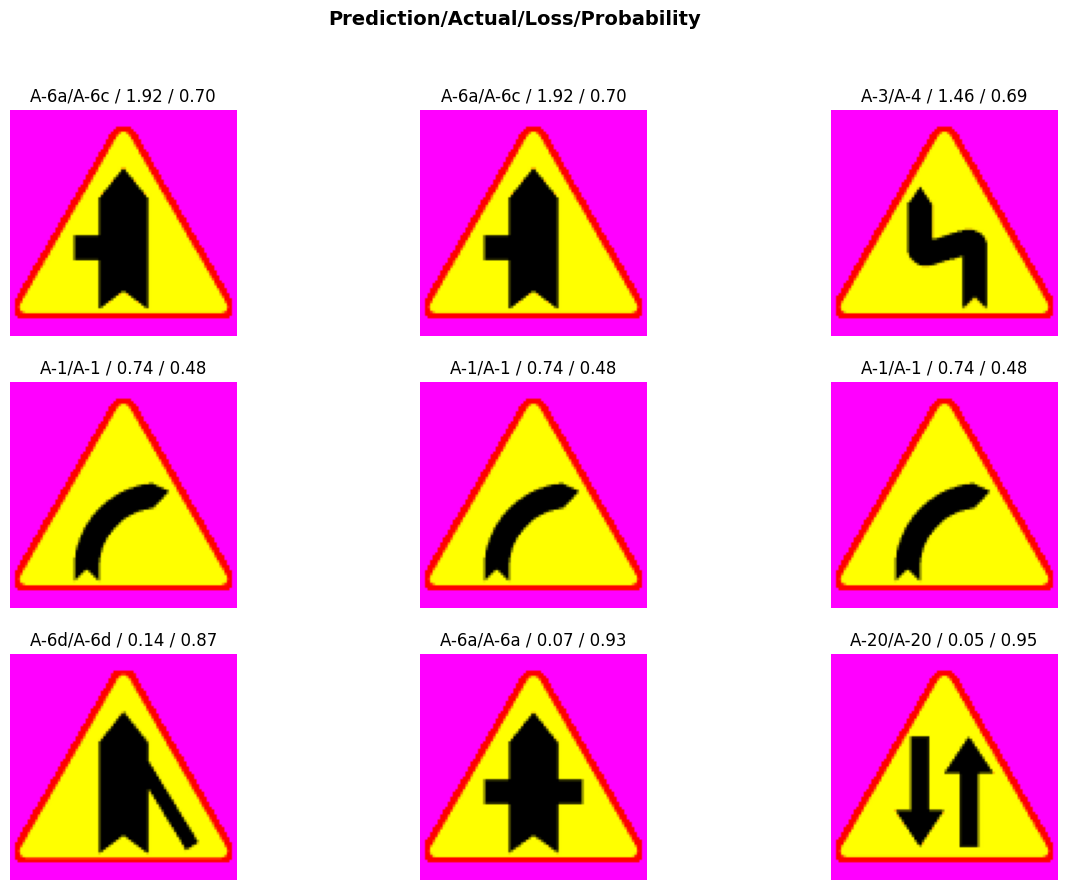

In [12]:
from fastai.interpret import  Interpretation
interp = Interpretation.from_learner(learner.model)
interp.plot_top_losses(9, figsize=(15,10))

In [30]:
from fastai.vision.widgets import *
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
from fastai.vision.core import PILImage
from PIL_OpenCV_conversions import PILToOpenCV
from OpenCV_plots import plotOpenCV

imagePIL = PILImage.create(btn_upload.data[-1])

BGRImage = PILToOpenCV(imagePIL)
plotOpenCV(BGRImage)

In [ ]:
from PIL_OpenCV_conversions import OpenCVToPIL
from dataset_prepare import thresholdWithMagentaBackground
preprocessedImage = thresholdWithMagentaBackground(BGRImage)
imageToClassify = OpenCVToPIL(preprocessedImage)
plotOpenCV(preprocessedImage)

In [31]:
from sign_classifier import SignClassifier
from fastai.vision.core import PILImage

classifier = SignClassifier(modelPath)
classifyResult = classifier.classifySign(imageToClassify)
classifyResult.getClassifiedType()

IndexError: list index out of range

In [ ]:
classifyResult.getPredictions()